# Playing with CairoMakie

In [1]:
using DataFrames, MLJ, CairoMakie
X, y = @load_boston;
X = DataFrame(X)
y = Vector(y);

In [4]:
model = @load RidgeRegressor pkg=MLJLinearModels
pipe = @pipeline Standardizer model
m = machine(pipe, X, y)
fit!(m)

import MLJLinearModels ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\julio\.julia\packages\MLJModels\GKDnU\src\loading.jl:168
┌ Info: Training Machine{Pipeline276,…}.
└ @ MLJBase C:\Users\julio\.julia\packages\MLJBase\QXObv\src\machines.jl:403
┌ Info: Training Machine{Standardizer,…}.
└ @ MLJBase C:\Users\julio\.julia\packages\MLJBase\QXObv\src\machines.jl:403
┌ Info: Training Machine{RidgeRegressor,…}.
└ @ MLJBase C:\Users\julio\.julia\packages\MLJBase\QXObv\src\machines.jl:403


Machine{Pipeline276,…} trained 1 time; caches data
  args: 
    1:	Source @882 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @943 ⏎ `AbstractVector{Continuous}`


In [5]:
yhat = predict(m)

506-element Vector{Float64}:
 30.197384538717937
 25.22079153660802
 30.807620002556277
 28.737459813140706
 28.080314342394903
 25.362839728331192
 23.23741311322145
 19.785596338165824
 11.66572465121567
 19.15465223718598
  ⋮
 19.185390301811807
 21.384870691417916
 18.516173164158797
 20.572362075706273
 23.697029182618863
 22.53425463306823
 27.88407458561153
 26.364262663543485
 22.515173101732984

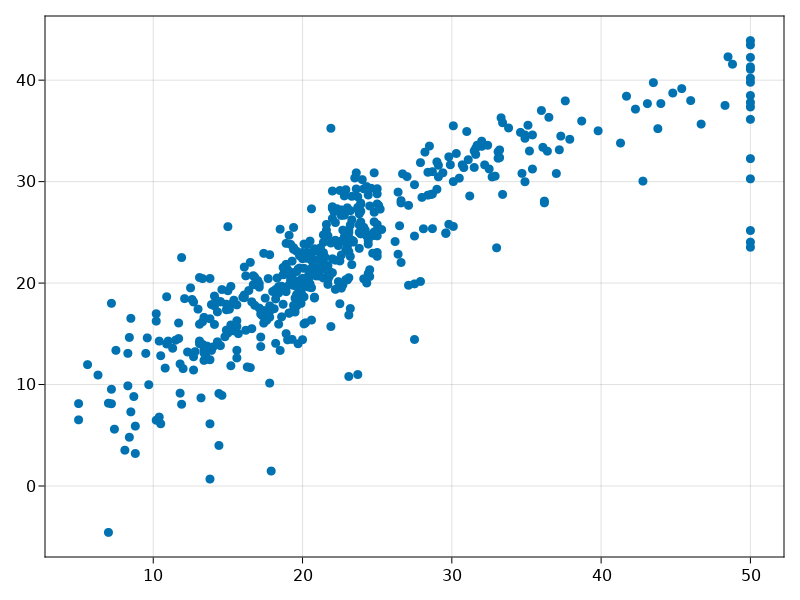

In [6]:
scatter(y, yhat)